<a href="https://colab.research.google.com/github/lucianogarim/Analise_Exploratoria_de_Dados_Petrofisica/blob/main/T%C3%B3pico_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análise Exploratória de Dados para Petrofísica**

Nesta terceira aula iremos abordar tópicos de análise univariada.
As seguintes bibliotecas serão utilizadas:

1.   Pandas
2.   Matplotlib
3.   Numpy
4.   Seaborn
5.   Sklearn
6.   Scipy
7.   Plotly
8.   Lasio

In [ ]:
!pip install lasio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 1.4 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import MDS
from sklearn.metrics import pairwise_distances
from scipy.cluster.hierarchy import linkage, dendrogram
import plotly.express as px
import plotly.graph_objects as go
import lasio

In [ ]:
# URL do conjunto de dados hospedado no GitHub
URL = "https://raw.githubusercontent.com/lucianogarim/Analise_Exploratoria_de_Dados_Petrofisica/refs/heads/main/Po%C3%A7o%20do%20Curso.las"
las = lasio.read(URL)

# Transformação do formato .las para dataframe(específico para Python)
df = las.df().reset_index()
df

,DEPTH,BS,DT,DWAL,DWCA,DWFE,DWGD,DWS,DWSI,DWTI,...,NMRFL_FINAL,NMRT_FINAL,NPHI,PE,RD,RHOB,RM,RS,T2LM,TVDSS
0,5180.076,NaN,59.104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,-0.016,NaN,NaN,NaN,NaN,NaN,NaN,4896.684
1,5180.229,NaN,59.104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,-0.016,10.0,407.215,4.629,246.206,1950.00,NaN,4896.822
2,5180.381,NaN,59.104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,-0.016,10.0,407.215,4.629,246.206,1950.00,NaN,4896.960
3,5180.533,NaN,59.104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,-0.016,10.0,407.215,4.629,246.206,1950.00,NaN,4897.098
4,5180.686,NaN,59.104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,-0.016,10.0,407.215,4.629,246.206,1950.00,NaN,4897.236
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2192,5514.137,NaN,65.550,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.223,NaN,1.588,NaN,1.536,1.97,NaN,5205.210
2193,5514.289,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.223,NaN,1.588,NaN,1.536,1.97,NaN,5205.351
2194,5514.441,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.223,NaN,1.588,NaN,1.536,1.97,NaN,5205.492
2195,5514.594,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.223,NaN,1.588,NaN,1.536,1.97,NaN,5205.634


In [ ]:
df.dropna(inplace = True)
df

,DEPTH,BS,DT,DWAL,DWCA,DWFE,DWGD,DWS,DWSI,DWTI,...,NMRFL_FINAL,NMRT_FINAL,NPHI,PE,RD,RHOB,RM,RS,T2LM,TVDSS
171,5206.137,12.25,58.574,0.002,0.259,0.001,0.000,0.039,0.142,0.0,...,0.000,0.026,0.054,6.934,344.169,2.740,178.240,804.265,13.557,4920.424
172,5206.289,12.25,60.515,0.002,0.230,0.002,0.000,0.034,0.176,0.0,...,0.000,0.017,0.069,5.748,296.665,2.671,175.440,747.899,3.751,4920.563
173,5206.441,12.25,61.126,0.002,0.212,0.002,0.000,0.032,0.199,0.0,...,0.000,0.020,0.097,4.984,223.558,2.606,151.759,1632.623,1.931,4920.703
174,5206.594,12.25,62.994,0.004,0.224,0.003,0.000,0.028,0.183,0.0,...,0.000,0.029,0.120,4.658,166.852,2.555,131.178,1250.840,1.410,4920.842
175,5206.746,12.25,65.213,0.005,0.255,0.004,2.197,0.019,0.150,0.0,...,0.007,0.051,0.157,4.750,95.657,2.511,80.562,1498.745,2.037,4920.981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2066,5494.935,12.25,65.547,0.005,0.359,0.004,0.000,0.006,0.035,0.0,...,0.141,0.182,0.223,5.340,2.147,2.446,2.279,2.993,139.198,5187.434
2067,5495.087,12.25,65.553,0.003,0.363,0.002,0.000,0.004,0.036,0.0,...,0.141,0.179,0.223,5.340,2.187,2.446,2.333,3.193,142.902,5187.575
2068,5495.239,12.25,65.548,0.003,0.367,0.002,0.000,0.006,0.030,0.0,...,0.138,0.172,0.223,5.340,2.104,2.446,2.212,2.903,133.243,5187.716
2069,5495.392,12.25,65.542,0.003,0.373,0.002,0.000,0.007,0.023,0.0,...,0.135,0.165,0.223,5.340,1.903,2.446,1.993,2.602,143.952,5187.857


#Gráficos de Análise Multivariada

Plot Bivariado

In [ ]:
# Vamos identificar as colunas presentes no conjunto de dados
df.columns

Index(['DEPTH', 'BS', 'DT', 'DWAL', 'DWCA', 'DWFE', 'DWGD', 'DWS', 'DWSI',
       'DWTI', 'GR', 'GRT', 'HCAL', 'HDRA', 'HFK', 'HTHO', 'HURA', 'KSDR',
       'KTIM', 'NMRE_FINAL', 'NMRFL_FINAL', 'NMRT_FINAL', 'NPHI', 'PE', 'RD',
       'RHOB', 'RM', 'RS', 'T2LM', 'TVDSS'],
      dtype='object')

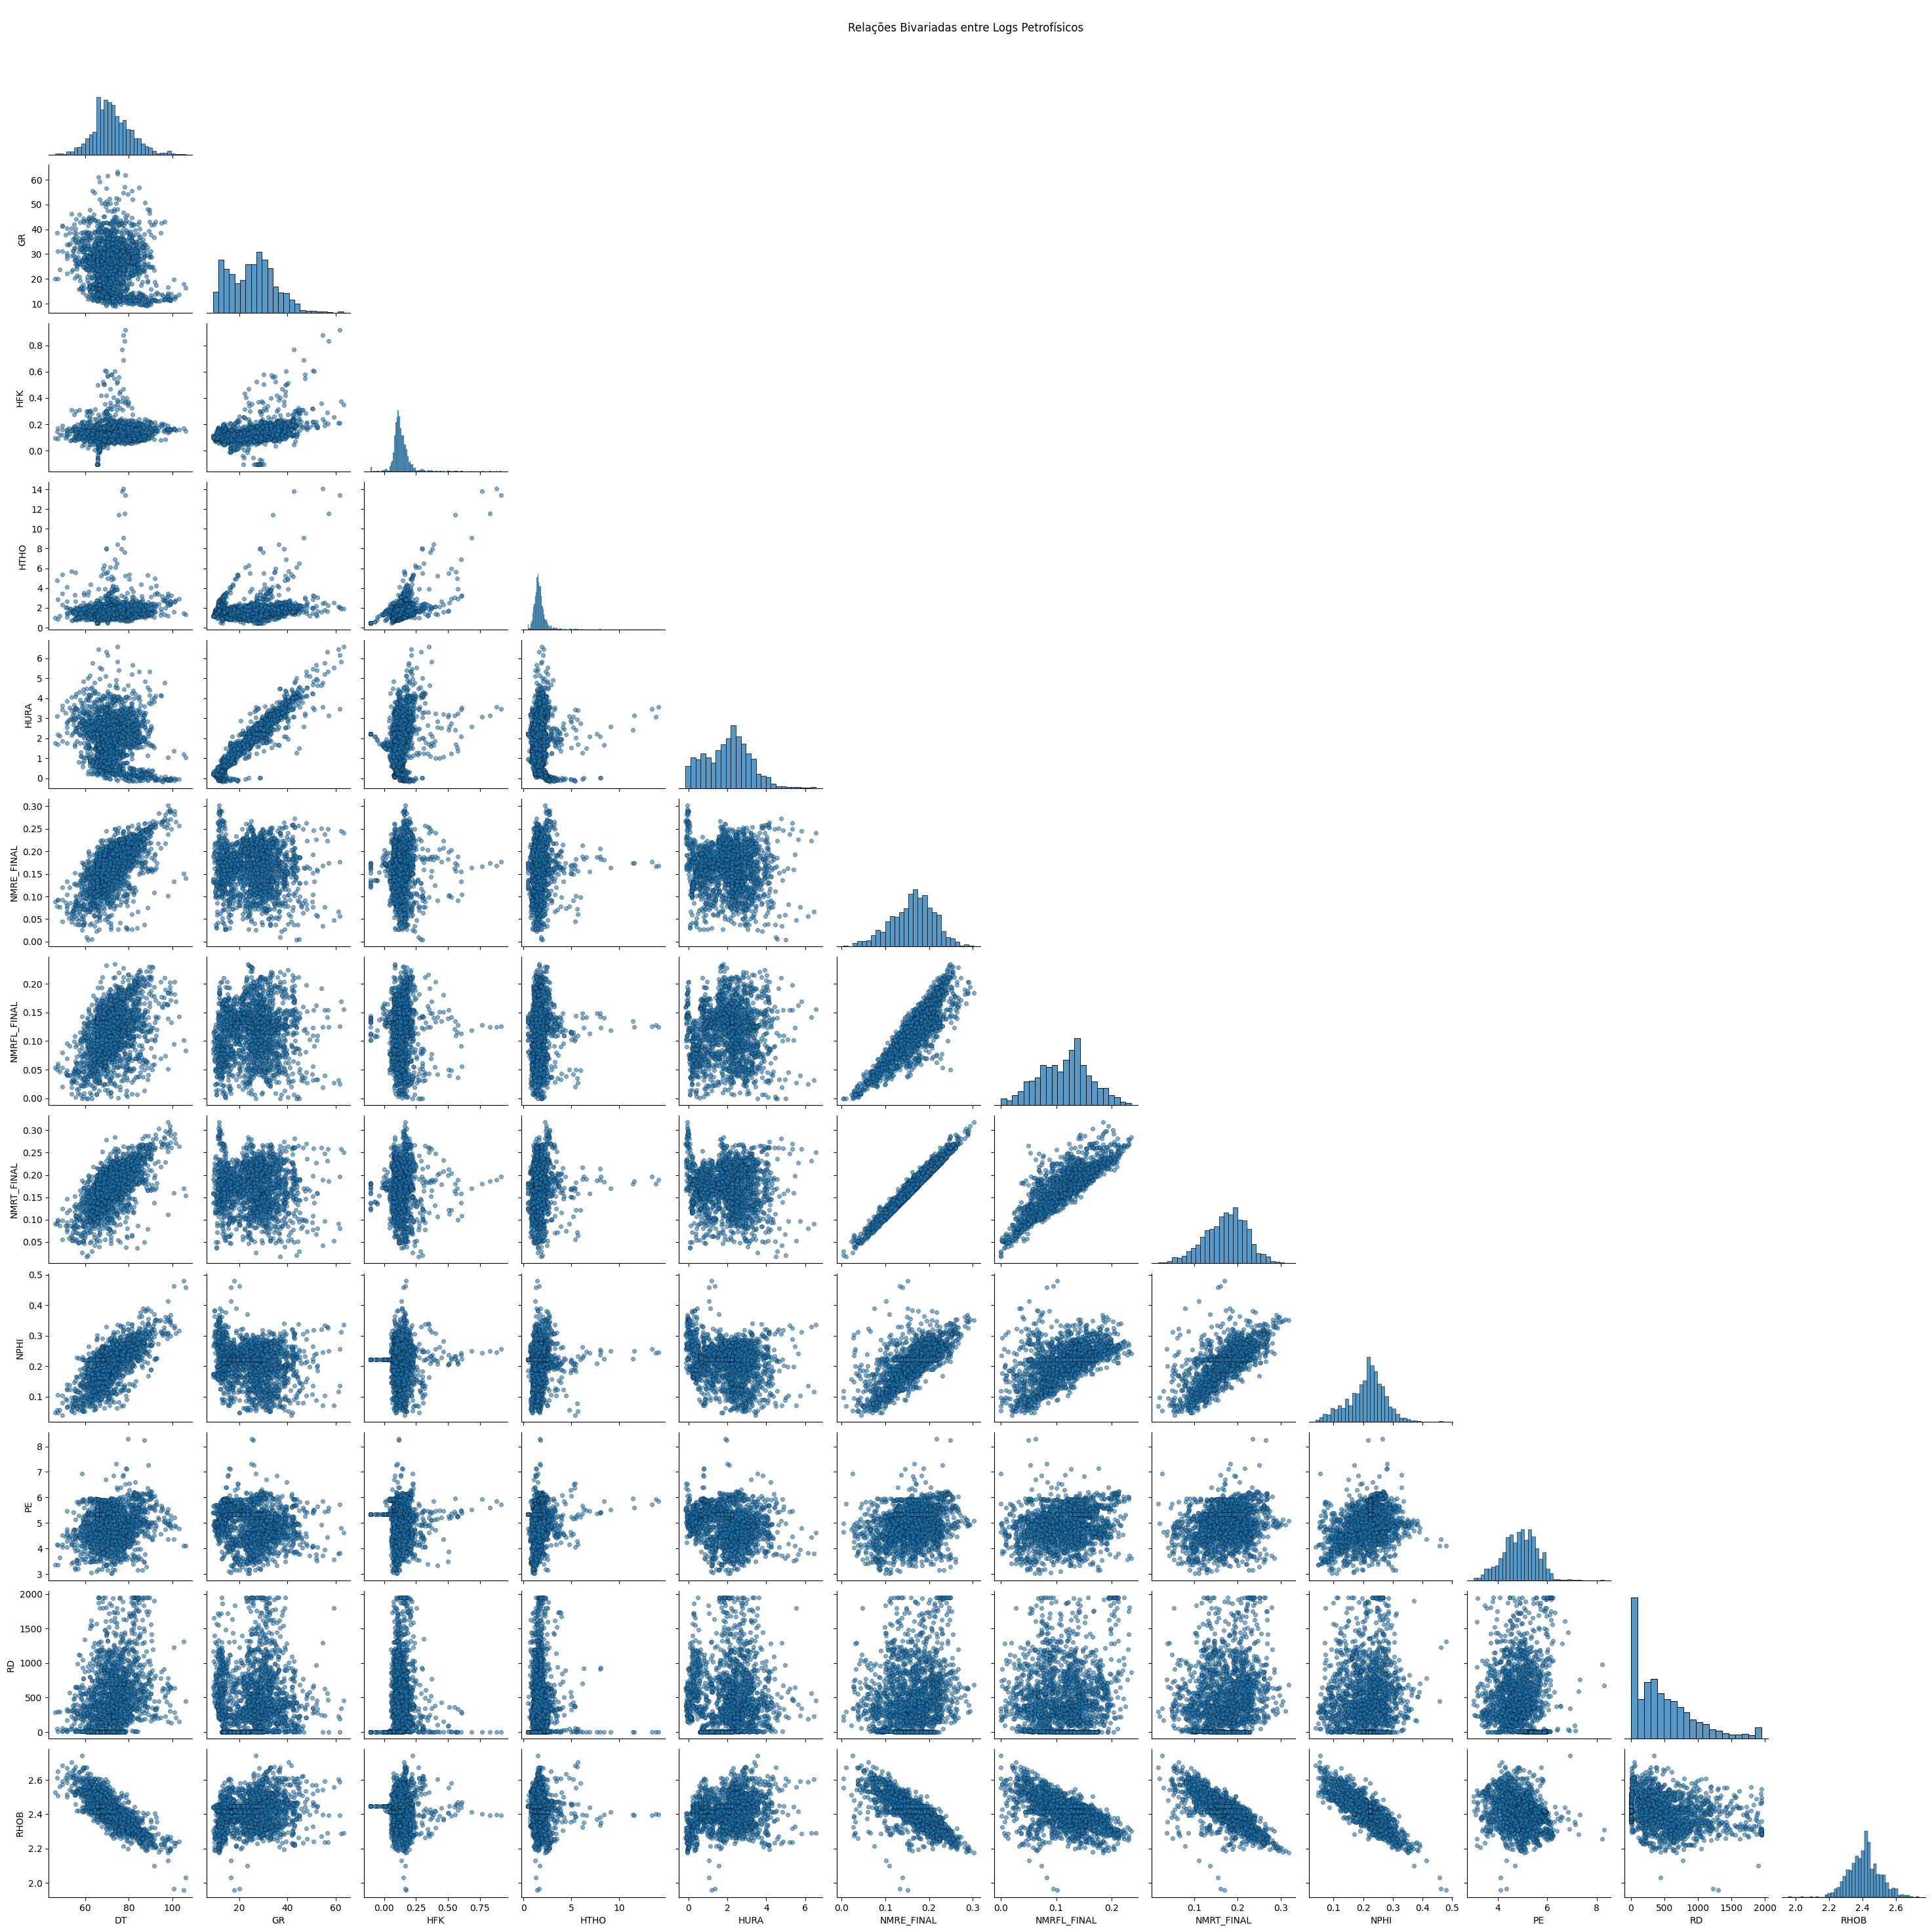

In [ ]:
# Vamos selecionar alguns logs para analisar par a par
logs = ['DT', 'GR', 'HFK', 'HTHO', 'HURA', 'NMRE_FINAL', 'NMRFL_FINAL', 'NMRT_FINAL', 'NPHI', 'PE', 'RD','RHOB']

# Pairplot sem agrupamento por litologia
sns.pairplot(df[logs], diag_kind="hist", corner=True,
             plot_kws={'alpha':0.6, 's':20, 'edgecolor':'k'})

plt.suptitle("Relações Bivariadas entre Logs Petrofísicos")
plt.show()

Gráfico de Dispersão 3D

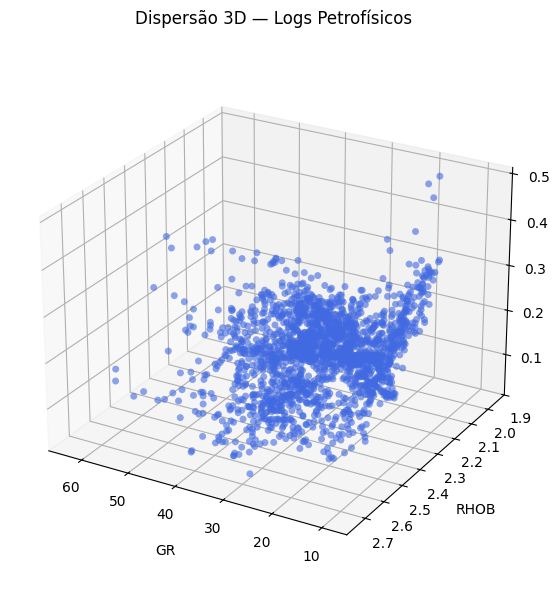

In [ ]:
# Cria figura 3D
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

# Dispersão 3D
ax.scatter(df['GR'], df['RHOB'], df['NPHI'],
           c='royalblue', s=25, alpha=0.6, edgecolor='none')

# Rótulos dos eixos
ax.set_xlabel(f'GR', labelpad=10)
ax.set_ylabel(f'RHOB', labelpad=10)
ax.set_zlabel(f'NPHI', labelpad=10)
ax.set_title('Dispersão 3D — Logs Petrofísicos', pad=20)

# Melhora visual
ax.grid(True, linestyle='--', alpha=0.3)
ax.view_init(elev=25, azim=120)  # ângulo da câmera

plt.tight_layout()
plt.show()


Gráfico de Dispersão 3D Interativo

In [ ]:
# Cria o scatter 3D interativo
fig = px.scatter_3d(
    df,
    x='GR', y='RHOB', z='NPHI',
    color='NMRFL_FINAL',                # cor por uma das variáveis
    color_continuous_scale='Turbo',
    opacity=0.7,
    size_max=6,
    title=f'Dispersão 3D — Logs Petrofísicos',
)

# Ajusta layout
fig.update_traces(marker=dict(size=4))
fig.update_layout(
    scene=dict(
        xaxis_title='GR',
        yaxis_title='RHOB',
        zaxis_title='NPHI',
        bgcolor='rgba(0,0,0,0)'  # fundo transparente
    ),
    width=800, height=600,
    margin=dict(l=0, r=0, b=0, t=40)
)

fig.show()

Heatmap de Matriz de Correlação de Pearson

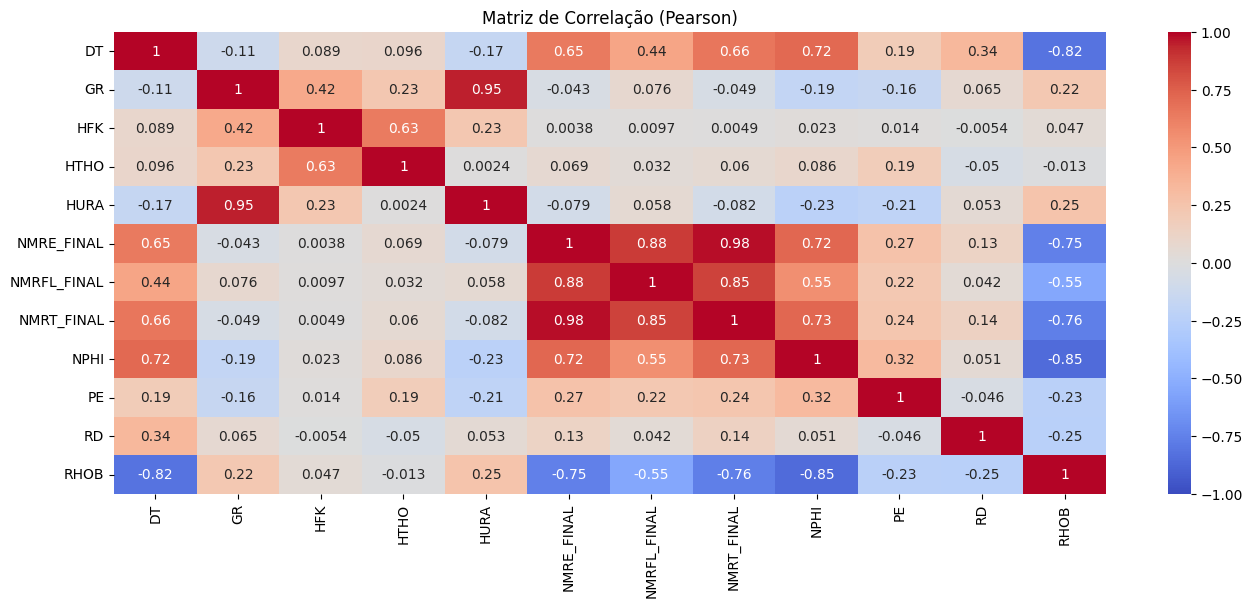

In [ ]:
plt.figure(figsize=(16, 6))

# Calcula a matriz de correlação
corr_matrix = np.corrcoef(df[logs], rowvar=False)

# Cria o heatmap com rótulos personalizados
sns.heatmap(corr_matrix,
            vmin=-1,
            vmax=1,
            annot=True,
            cmap='coolwarm',
            xticklabels=logs,  # Define os rótulos das colunas
            yticklabels=logs)  # Define os rótulos das linhas

plt.title('Matriz de Correlação (Pearson)')
plt.show()


# Técnicas de Engenharia de Atributos

Análise de Componentes Principais

In [ ]:
scaler = StandardScaler()
Z = scaler.fit_transform(df[logs])

# PCA com 3 PCs
n_pc = 3
pca = PCA(n_components=n_pc)
Zp = pca.fit_transform(Z)  # projeções
expl = pca.explained_variance_ratio_

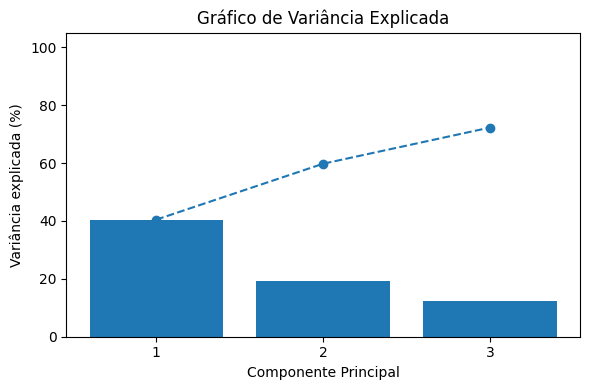

In [ ]:
plt.figure(figsize=(6,4))
plt.bar(range(1, n_pc+1), expl*100)
plt.plot(range(1, n_pc+1), np.cumsum(expl*100), marker='o', linestyle='--')
plt.xticks(range(1, n_pc+1))
plt.ylabel('Variância explicada (%)')
plt.xlabel('Componente Principal')
plt.title('Gráfico de Variância Explicada')
plt.ylim(0, 105)
plt.tight_layout()
plt.show()

Plot das componentes, cargas e dados projetados

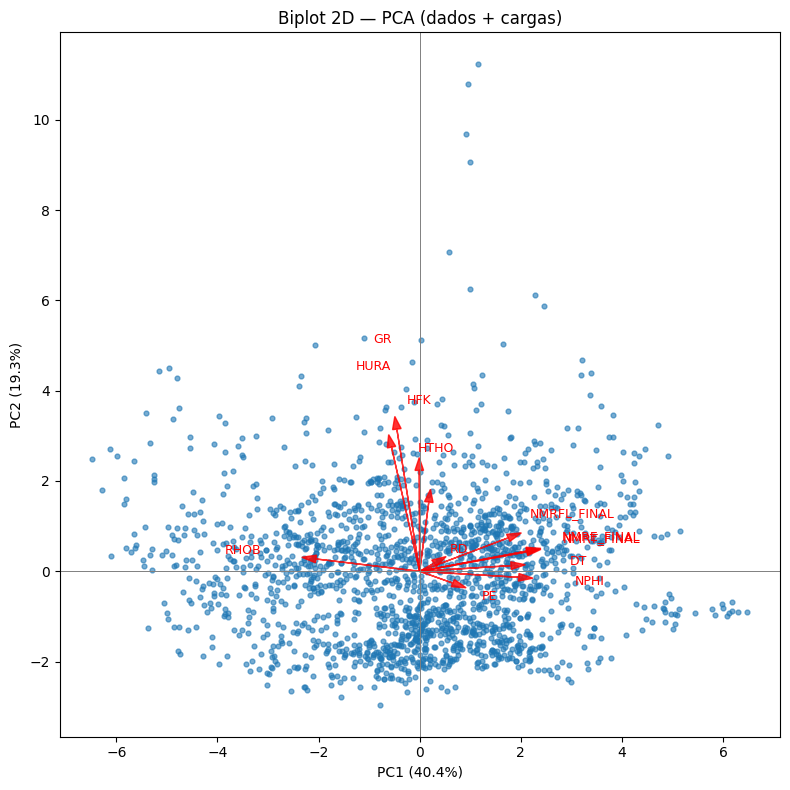

In [ ]:
pc1_var = expl[0]*100
pc2_var = expl[1]*100

# projeções 2D
x_pc = Zp[:,0]
y_pc = Zp[:,1]

# loadings: peso de cada variável em cada PC
loadings = pca.components_.T[:, :2]  # apenas PC1 e PC2

# escala das setas para caber no gráfico
scale = 0.4 * max(x_pc.max()-x_pc.min(), y_pc.max()-y_pc.min())

plt.figure(figsize=(8,8))
plt.scatter(x_pc, y_pc, s=12, alpha=0.6)
plt.axhline(0, color='gray', lw=0.7); plt.axvline(0, color='gray', lw=0.7)

# desenha setas das cargas
for i, var in enumerate(logs):
    plt.arrow(0, 0,
              loadings[i,0]*scale, loadings[i,1]*scale,
              head_width=0.03*scale, head_length=0.05*scale,
              fc='red', ec='red', alpha=0.8, length_includes_head=True)
    plt.text(loadings[i,0]*scale*1.5,
              loadings[i,1]*scale*1.5,
              var, color='red', fontsize=9, ha='center', va='center')

plt.xlabel(f'PC1 ({pc1_var:.1f}%)')
plt.ylabel(f'PC2 ({pc2_var:.1f}%)')
plt.title('Biplot 2D — PCA (dados + cargas)')
plt.tight_layout()
plt.show()


Plot Interativo 3D para PCA

In [ ]:
load = pca.components_.T

# escala das setas 3D
x_rng = Zp[:,0].max() - Zp[:,0].min()
y_rng = Zp[:,1].max() - Zp[:,1].min()
z_rng = Zp[:,2].max() - Zp[:,2].min()
scale3 = 0.35 * max(x_rng, y_rng, z_rng)

# pontos (dados projetados)
pts = go.Scatter3d(
    x=Zp[:,0], y=Zp[:,1], z=Zp[:,2],
    mode='markers',
    marker=dict(size=3, opacity=0.7),
    name='Dados'
)

# vetores (cargas)
vec_traces = []
for i, var in enumerate(logs):
    x0,y0,z0 = 0,0,0
    x1 = load[i,0]*scale3
    y1 = load[i,1]*scale3
    z1 = load[i,2]*scale3
    vec_traces.append(go.Scatter3d(
        x=[x0,x1], y=[y0,y1], z=[z0,z1],
        mode='lines+text',
        line=dict(color='red', width=6),
        text=[None, var],
        textposition="top center",
        name=f'Load {var}'
    ))

fig = go.Figure(data=[pts] + vec_traces)
fig.update_layout(
    title=f'Biplot 3D — PCA (PC1 {expl[0]*100:.1f}%, PC2 {expl[1]*100:.1f}%, PC3 {expl[2]*100:.1f}%)',
    scene=dict(
        xaxis_title=f'PC1 ({expl[0]*100:.1f}%)',
        yaxis_title=f'PC2 ({expl[1]*100:.1f}%)',
        zaxis_title=f'PC3 ({expl[2]*100:.1f}%)',
        bgcolor='rgba(0,0,0,0)'
    ),
    width=900, height=650,
    showlegend=False
)
fig.show()


Escalonamento Multidimensional (MDS)

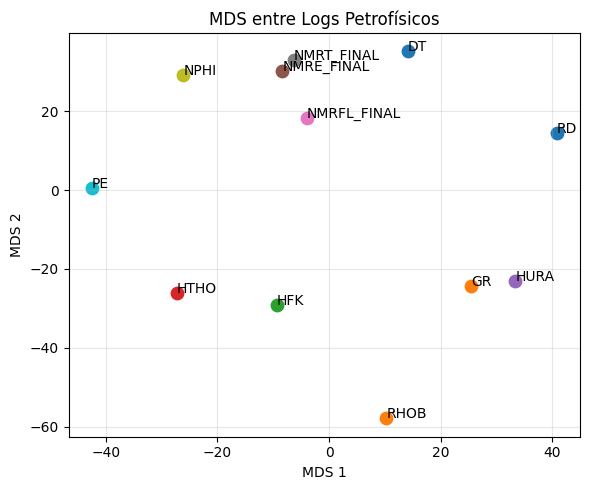

In [ ]:
D = pairwise_distances(Z.T, metric='euclidean')

# MDS entre variáveis
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
coords = mds.fit_transform(D)

plt.figure(figsize=(6,5))
for i, var in enumerate(logs):
    plt.scatter(coords[i,0], coords[i,1], s=80)
    plt.text(coords[i,0]+0.02, coords[i,1], var, fontsize=10)

plt.title('MDS entre Logs Petrofísicos')
plt.xlabel('MDS 1')
plt.ylabel('MDS 2')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


Dendograma das Variáveis

/tmp/ipython-input-1476774315.py:1: ClusterWarning:

The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix



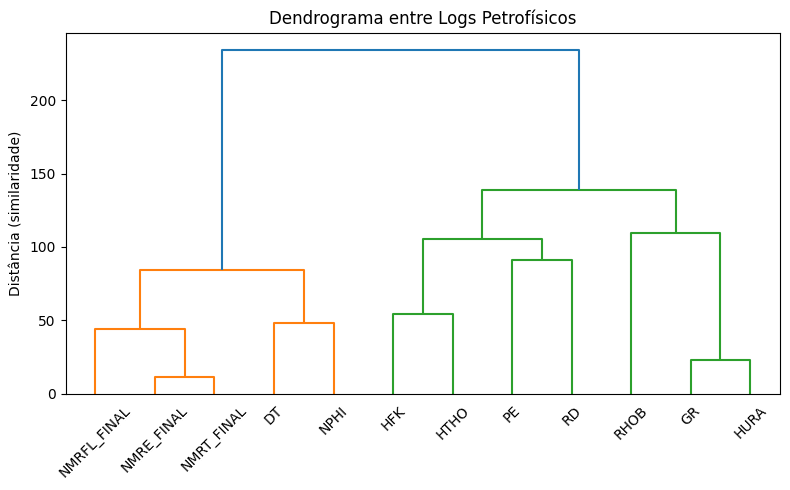

In [ ]:
linkage_matrix = linkage(D, method='ward')

plt.figure(figsize=(8,5))
dendrogram(linkage_matrix, labels=logs, leaf_rotation=0, leaf_font_size=10)
plt.xticks(rotation=45)
plt.title('Dendrograma entre Logs Petrofísicos')
plt.ylabel('Distância (similaridade)')
plt.tight_layout()
plt.show()

Detecção de Padrões Usando K-means

In [ ]:
k = 3  # número de clusters (você pode testar 3, 4, 5...)
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(Z)

# Adiciona clusters ao dataframe
df_clusters = df[logs].copy()
df_clusters['Cluster'] = clusters

# PCA só para visualização 2D
pca = PCA(n_components=2)
Zp = pca.fit_transform(Z)

# === 5) Plot ===
plt.figure(figsize=(8,7))
sns.scatterplot(x=Zp[:,0], y=Zp[:,1], hue=clusters, palette='tab10', s=40, alpha=0.8)
plt.axhline(0, color='gray', lw=0.7); plt.axvline(0, color='gray', lw=0.7)

# === Adiciona vetores das cargas ===
scale = 6  # aumenta o tamanho das setas
for i, var in enumerate(logs):
    plt.arrow(0, 0,
              loadings[i,0]*scale, loadings[i,1]*scale,
              head_width=0.1, head_length=0.1,
              fc='red', ec='red', lw=1.5)
    plt.text(loadings[i,0]*scale,
             loadings[i,1]*scale,
             var, color='red', fontsize=10, weight='bold')

# === Rótulos ===
plt.xlabel(f'PC1 ({expl[0]*100:.1f}%)')
plt.ylabel(f'PC2 ({expl[1]*100:.1f}%)')
plt.title('K-Means + PCA — Dados e Cargas')
plt.legend(title='Cluster')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()
